# importing packages and data

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [6]:
df = pd.read_csv(r"D:\e_commerce_p\US  E-commerce records 2020.csv",encoding = 'latin1')
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


# data processing 

In [5]:
df.shape

(3312, 19)

In [3]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df = df[['Order Date','Ship Mode','Segment','Country', 'City', 'State','Region',
        'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit']]

In [8]:
df.head()

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,Standard Class,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,First Class,Home Office,United States,Franklin,Wisconsin,Central,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,Standard Class,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [9]:
df.describe().round(2)

,Sales,Quantity,Discount,Profit
count,3312.00,3312.00,3312.00,3312.00
mean,221.38,3.77,0.16,28.21
std,585.26,2.22,0.21,241.86
min,0.44,1.00,0.00,-3839.99
25%,17.02,2.00,0.00,1.76
50%,53.81,3.00,0.20,8.30
75%,205.11,5.00,0.20,28.32
max,13999.96,14.00,0.80,6719.98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Ship Mode     3312 non-null   object 
 2   Segment       3312 non-null   object 
 3   Country       3312 non-null   object 
 4   City          3312 non-null   object 
 5   State         3312 non-null   object 
 6   Region        3312 non-null   object 
 7   Category      3312 non-null   object 
 8   Sub-Category  3312 non-null   object 
 9   Product Name  3312 non-null   object 
 10  Sales         3312 non-null   float64
 11  Quantity      3312 non-null   int64  
 12  Discount      3312 non-null   float64
 13  Profit        3312 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 232.9+ KB


In [10]:
df.isnull().sum()

Order Date      0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df.dtypes

Order Date      datetime64[ns]
Ship Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

# Exploratory Data Analysis (EDA)

In [7]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [8]:
segment_distribution = df['Segment'].value_counts()
segment_distribution

Consumer       1668
Corporate       980
Home Office     664
Name: Segment, dtype: int64

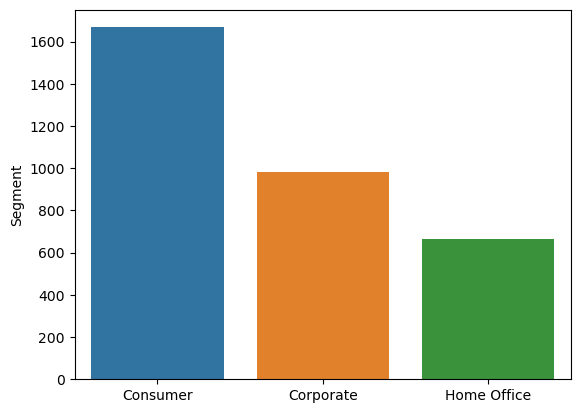

In [9]:
sns.barplot(x = segment_distribution.index,y= segment_distribution);

In [10]:
df[['Sales','Quantity','Discount','Profit']].describe().round()

,Sales,Quantity,Discount,Profit
count,3312.0,3312.0,3312.0,3312.0
mean,221.0,4.0,0.0,28.0
std,585.0,2.0,0.0,242.0
min,0.0,1.0,0.0,-3840.0
25%,17.0,2.0,0.0,2.0
50%,54.0,3.0,0.0,8.0
75%,205.0,5.0,0.0,28.0
max,14000.0,14.0,1.0,6720.0


In [10]:
correlations = df[['Sales','Quantity','Discount','Profit']].corr().round(2)
correlations

,Sales,Quantity,Discount,Profit
Sales,1.00,0.19,-0.03,0.53
Quantity,0.19,1.00,0.02,0.05
Discount,-0.03,0.02,1.00,-0.22
Profit,0.53,0.05,-0.22,1.00


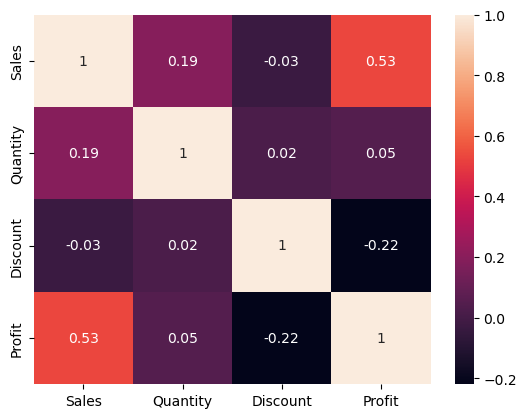

In [11]:
sns.heatmap(data=correlations,annot=True);

# Observation

# there's a strong positive correlation between Sales and profit for sure
# there's a strong negative correlation between Sales,profit and discount we will focus on this corr as it affects alot sales and profits 


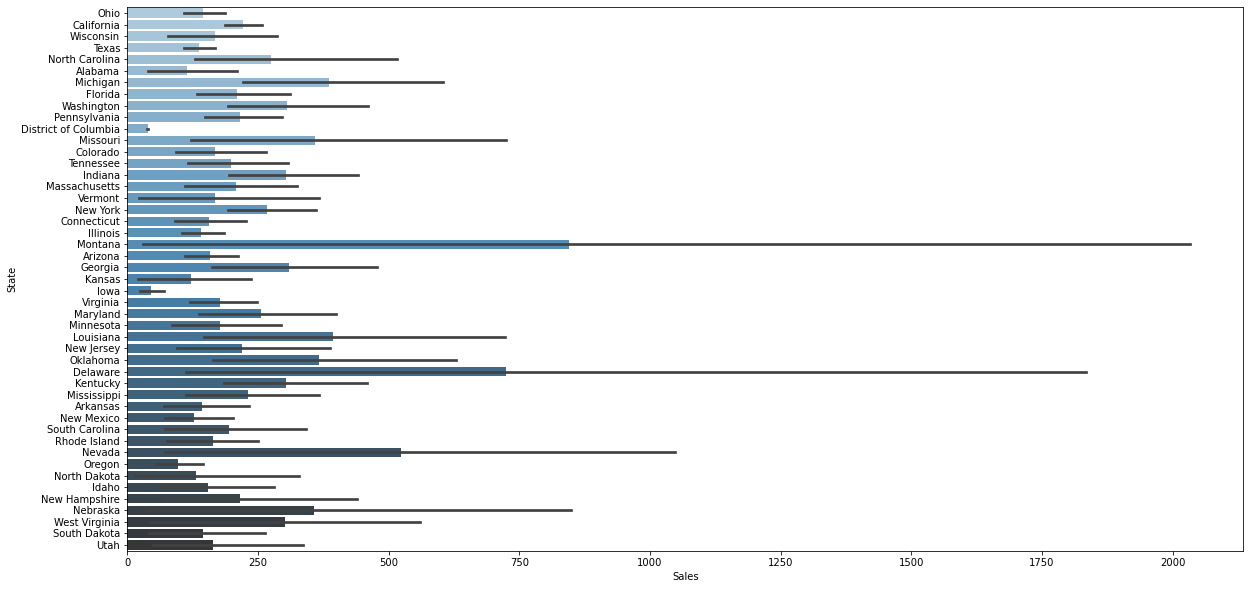

In [20]:
#identifying which state is selling most
plt.figure(figsize=(20,10))
sns.barplot(y=df.State,x=df.Sales,palette='Blues_d');

# Observation
# montana leading the way for cities with most sales 

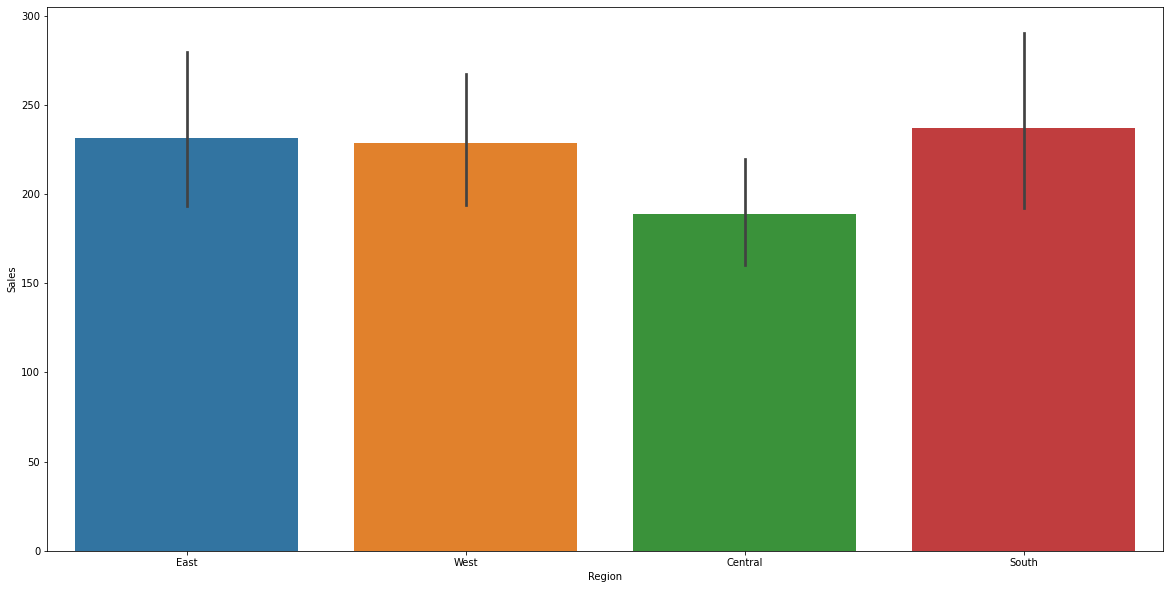

In [21]:
#identifying which region is selling most
plt.figure(figsize=(20,10))
sns.barplot(x=df.Region,y=df.Sales);

# Observation
# south on top not too far from east and west in sales 
# central is down there as the least region for sales 

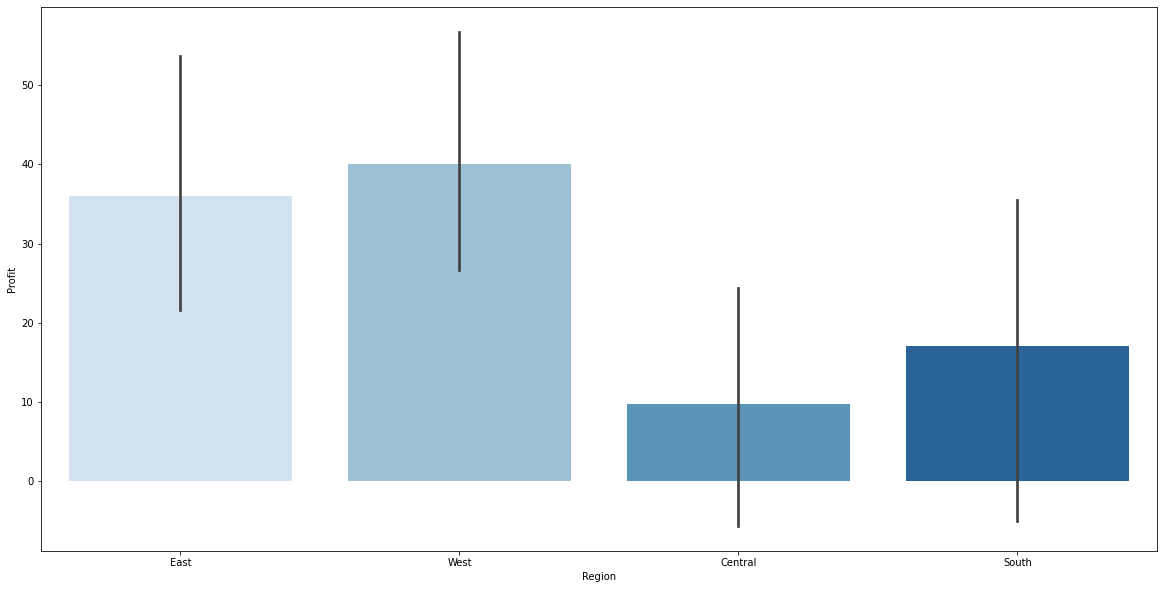

In [22]:
#despite most sales comes from south but the most profitable region is "west"
plt.figure(figsize=(20,10))
sns.barplot(x=df.Region,y=df.Profit,palette='Blues');

# Observation  
# west region is up there for profits
# central region is down there as the least profitable region later on we will discover why 

In [24]:
#central region with the least profit as it was on top for discounts
df[['Region','Discount']].groupby('Region')['Discount'].sum()

Region
Central    186.42
East       136.10
South       80.50
West       115.20
Name: Discount, dtype: float64

# Observation

# central region has the most discounts , no wonder this region has the least profits

# west region has the least discounts , later on we clearified it has the most profits

In [ ]:
df.head()

In [25]:
df.Category.value_counts()

Office Supplies    2002
Furniture           686
Technology          624
Name: Category, dtype: int64

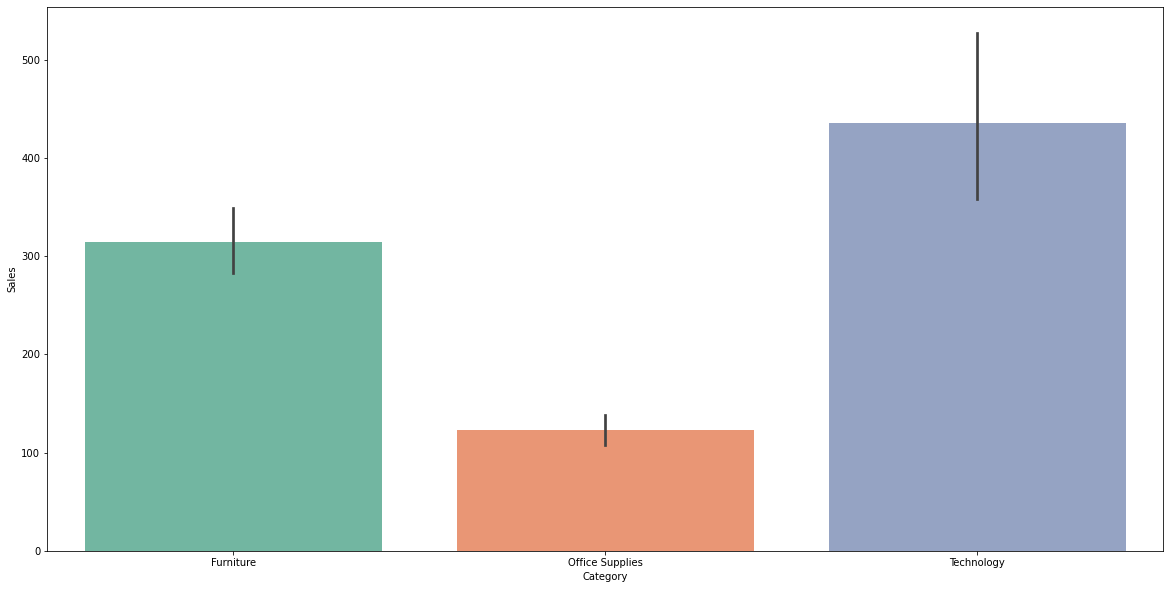

In [27]:
#Tech with the most income however these weren't the most selled,but i think they were expensive
plt.figure(figsize=(20,10))
sns.barplot(x=df.Category,y=df.Sales,palette='Set2');

# Observation 

# Tech with the most income however these weren't the most selled,but i think they were expensive enough to get us alot of money as income 



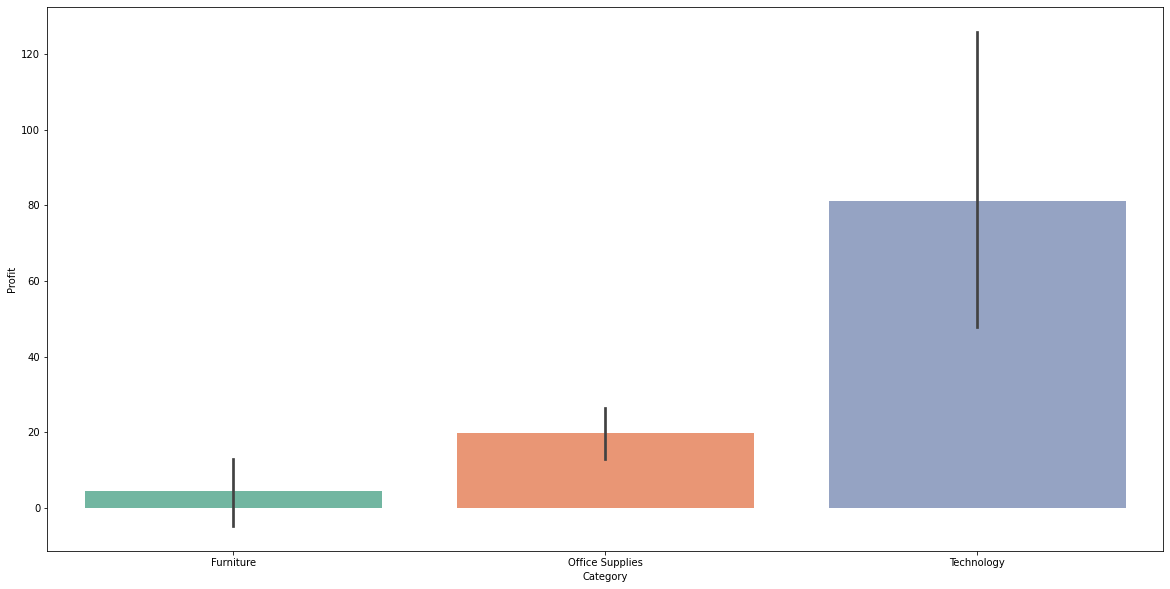

In [28]:
#tec stuff is expensive not surprised it has the most profits
plt.figure(figsize=(20,10))
sns.barplot(x=df.Category,y=df.Profit,palette='Set2');

# Observation

# tec stuff is expensive not surprised it has the most profits


In [30]:
df['Sub-Category'].unique()

array(['Furnishings', 'Binders', 'Storage', 'Chairs', 'Art', 'Appliances',
       'Machines', 'Tables', 'Accessories', 'Paper', 'Supplies',
       'Fasteners', 'Envelopes', 'Bookcases', 'Phones', 'Labels',
       'Copiers'], dtype=object)

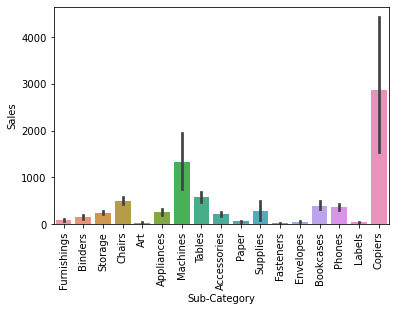

In [31]:
#identifying the relationship between sub-categories and sales
plt.xticks(rotation='vertical')
sns.barplot(x=df['Sub-Category'],y=df['Sales']);

# Observation

# copiers and machines as a sub-categories is up top for sales 

In [70]:
df['Discount'].unique()

array([0.2 , 0.  , 0.6 , 0.3 , 0.8 , 0.5 , 0.7 , 0.1 , 0.4 , 0.15, 0.32,
       0.45])

In [78]:
#checking the relation between discounts and profit
profit_discount= df.groupby('Discount')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
profit_discount

,Discount,Profit
0,0.00,104157.7122
3,0.20,33013.3314
1,0.10,3300.5929
2,0.15,537.5329
5,0.32,-492.2300
7,0.45,-1228.4406
9,0.60,-1968.8777
4,0.30,-3867.6022
8,0.50,-6864.3883
6,0.40,-7833.1461


# Observation

# a strong negative corr between discount and profit 

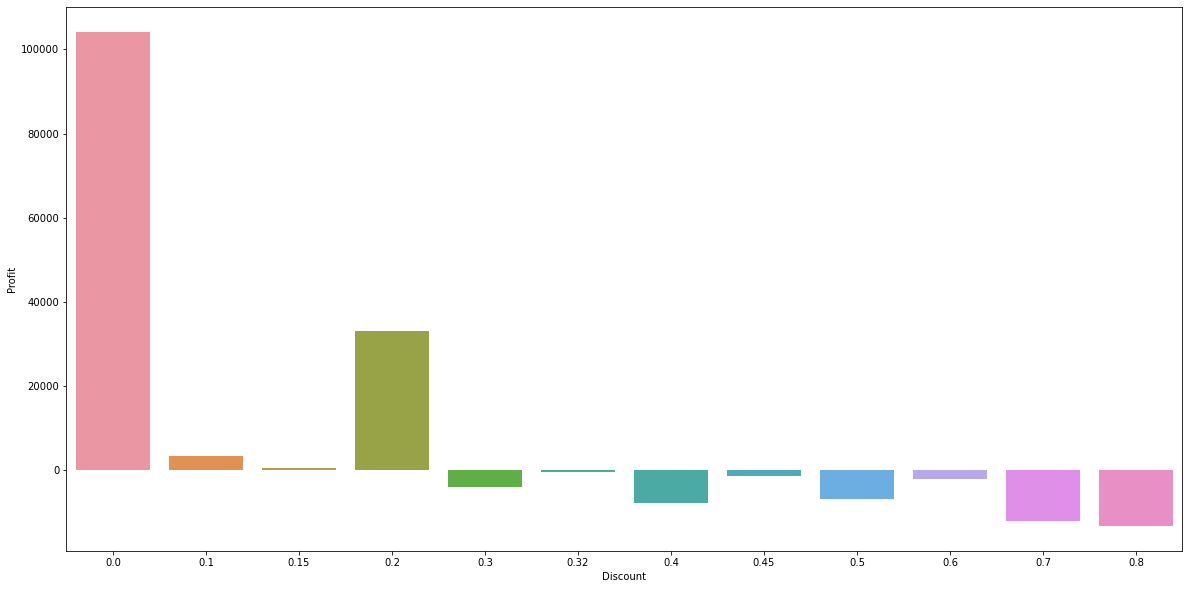

In [76]:
#identifying the relationship between discount and profit
plt.figure(figsize=(20,10))
plt.xticks(df['Discount'].unique())
sns.barplot(x=profit_discount['Discount'],y=profit_discount['Profit']);

In [16]:
#which products are commonly selling
products_high= df[['Product Name','Sales']].groupby('Product Name')['Sales'].sum().nlargest(10).reset_index().round()
products_high

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,35700.0
1,Martin Yale Chadless Opener Electric Letter Op...,11826.0
2,GBC DocuBind TL300 Electric Binding System,10943.0
3,Hewlett Packard LaserJet 3310 Copier,9240.0
4,Samsung Galaxy Mega 6.3,9240.0
5,Cubify CubeX 3D Printer Triple Head Print,8000.0
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,7372.0
7,HON 5400 Series Task Chairs for Big and Tall,7220.0
8,GBC DocuBind P400 Electric Binding System,7077.0
9,Lexmark MX611dhe Monochrome Laser Printer,5610.0


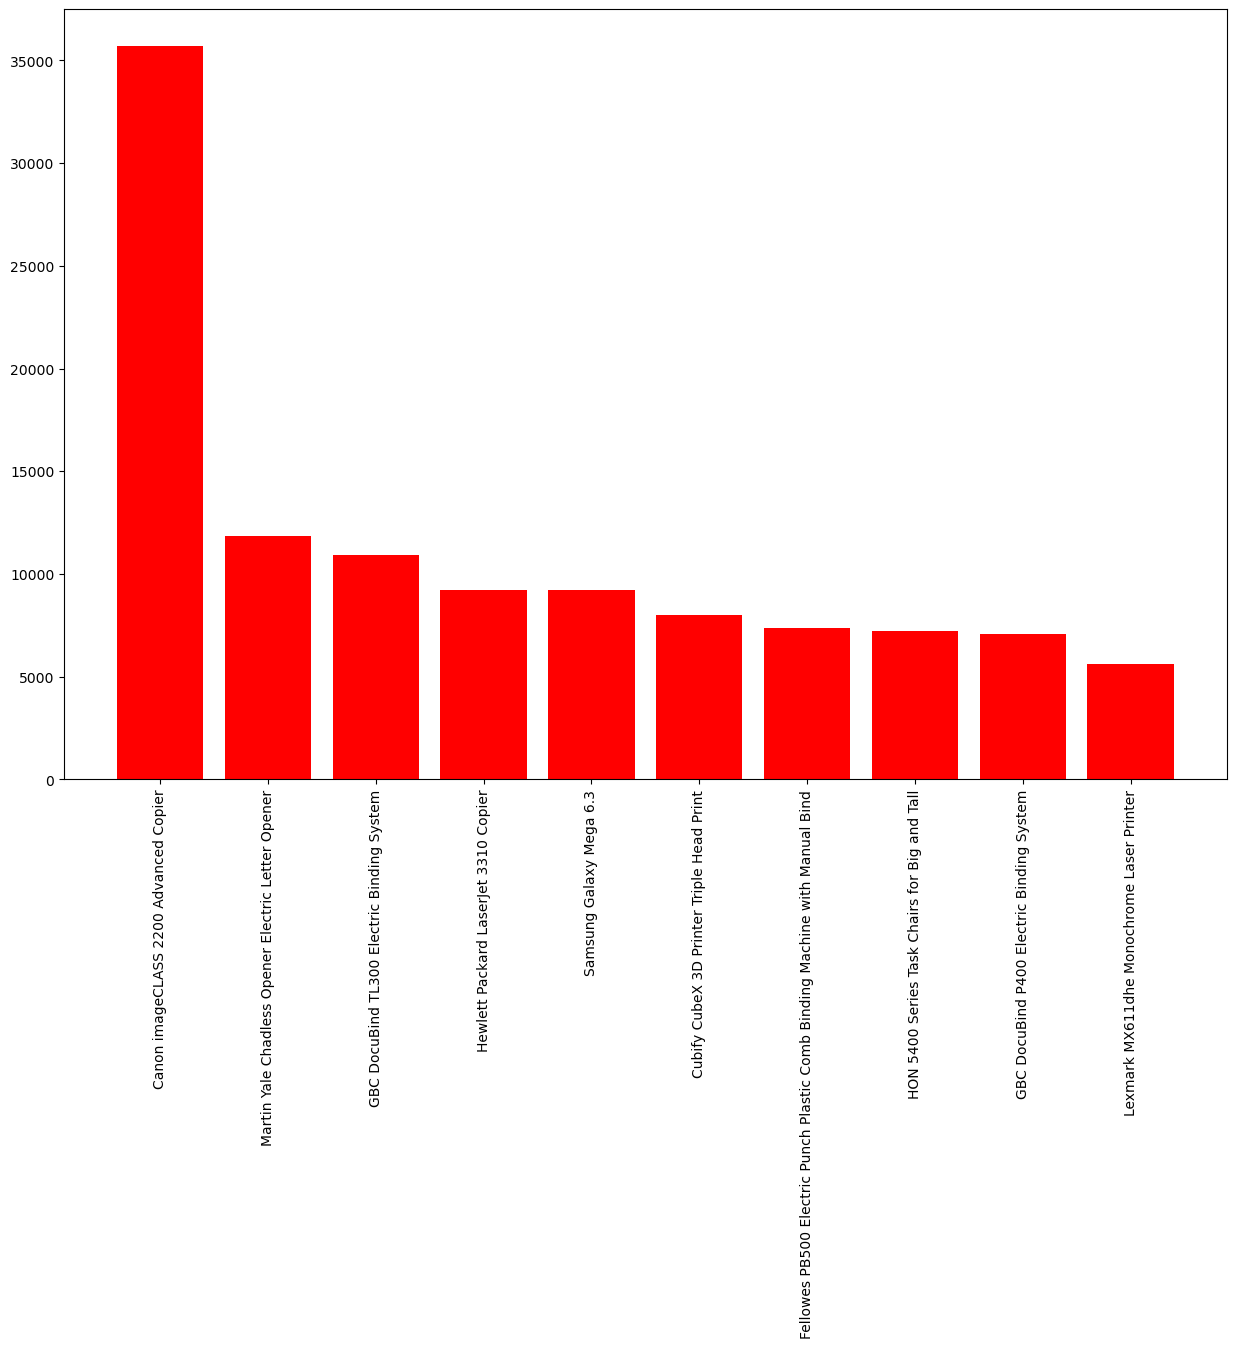

In [18]:
#Canon imageCLASS 2200 Advanced Copier on top
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(products_high['Product Name'],products_high['Sales'],color='red');

# Observation 

# Canon imageCLASS 2200 Advanced Copier is on top for sales 

In [141]:
#which products provides us with most profit
products_highprofit= df[['Product Name','Profit']].groupby('Product Name')['Profit'].sum().nlargest(10).reset_index().round()
products_highprofit

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,15680.0
1,Hewlett Packard LaserJet 3310 Copier,3624.0
2,GBC DocuBind TL300 Electric Binding System,1911.0
3,Fellowes PB300 Plastic Comb Binding Machine,1754.0
4,Canon Image Class D660 Copier,1692.0
5,Canon Imageclass D680 Copier / Fax,1680.0
6,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.0
7,Samsung Galaxy Mega 6.3,1470.0
8,"3D Systems Cube Printer, 2nd Generation, Magenta",1352.0
9,GBC DocuBind 300 Electric Binding Machine,1347.0


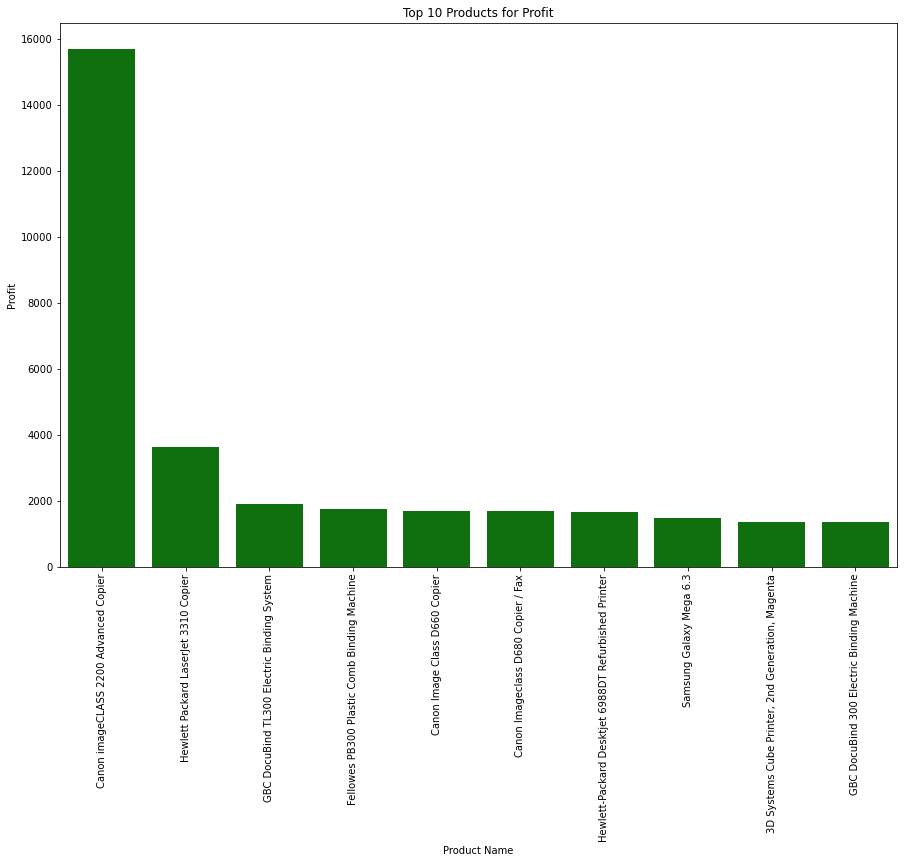

In [84]:
#Canon imageCLASS 2200 Advanced Copier is leading the way for profit
plt.figure(figsize=(15,10))
plt.title('Top 10 Products for Profit')
plt.xticks(rotation='vertical')
sns.barplot(x= products_highprofit['Product Name'],y=products_highprofit['Profit'],color='green');

# Observation

# Canon imageCLASS 2200 Advanced Copier is on top for sales also for profits

In [21]:
#products with the least sales 
least_sales_products = df[['Product Name','Sales']].groupby('Product Name')['Sales'].sum().tail(10).reset_index().sort_values(by='Sales')
least_sales_products

,Product Name,Sales
0,XtraLife ClearVue Slant-D Ring Binders by Card...,11.760
2,Zipper Ring Binder Pockets,35.256
1,Zebra Zazzle Fluorescent Highlighters,42.560
5,iKross Bluetooth Portable Keyboard + Cell Phon...,67.040
6,iOttie HLCRIO102 Car Mount,119.940
3,i.Sound Portable Power - 8000 mAh,137.774
9,netTALK DUO VoIP Telephone Service,167.968
8,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,205.086
7,iOttie XL Car Mount,223.888
4,iHome FM Clock Radio with Lightning Dock,643.908


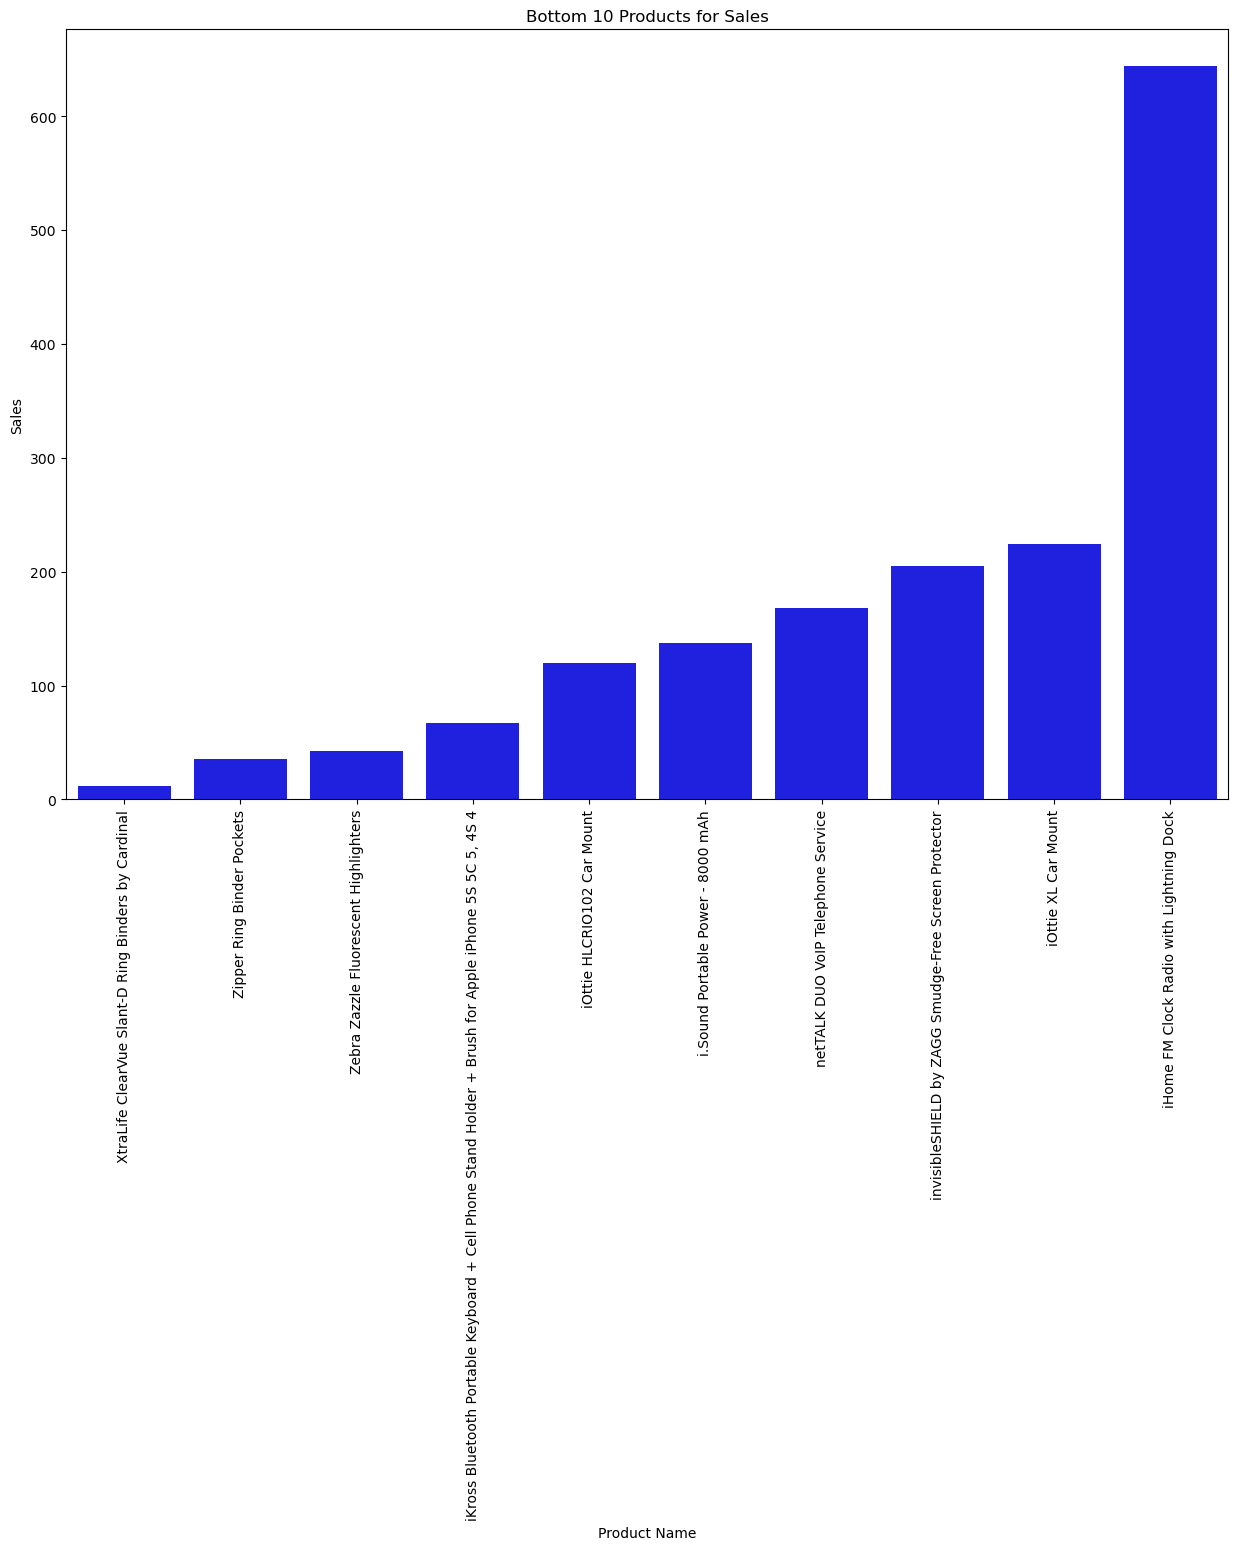

In [23]:
#Canon imageCLASS 2200 Advanced Copier is leading the way for profit
plt.figure(figsize=(15,10))
plt.title('Bottom 10 Products for Sales')
plt.xticks(rotation='vertical')
sns.barplot(x= least_profit_products['Product Name'],y=least_profit_products['Sales'],color='blue');

# Observation 

# XtraLife ClearVue Slant-D Ring Binders by Card provides the least sales 

In [ ]:
df.head()

In [38]:
cities_delivering = df[['City','Sales']].groupby('City')['Sales'].sum().nlargest(10).reset_index().sort_values(by='Sales',ascending=False)
cities_delivering

,City,Sales
0,New York City,86939.6010
1,Seattle,56990.8200
2,Los Angeles,48875.6925
3,Philadelphia,41595.5020
4,San Francisco,37197.5510
5,Columbus,17571.4730
6,Chicago,16245.6110
7,Houston,16212.8064
8,Newark,13808.4680
9,Jackson,13592.2710


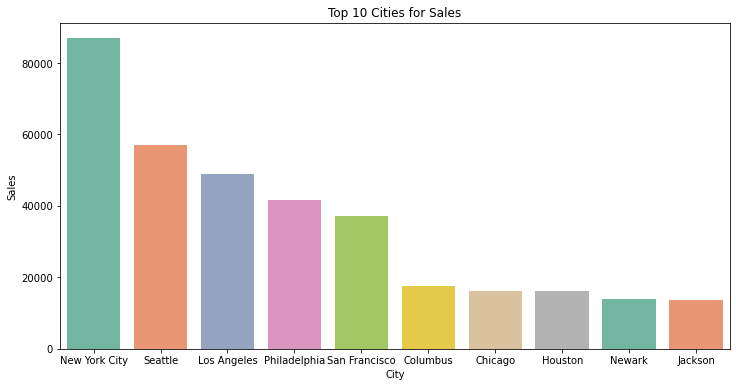

In [39]:
#new york is leading the way
plt.figure(figsize = (12,6))
plt.title('Top 10 Cities for Sales')
sns.barplot(x=cities_delivering['City'],y=cities_delivering['Sales'],palette='Set2');

# Observation 

# new york city is leading the way for sales , seattle and los angeles for 2nd and 3rd in that order 

In [40]:
df['State'].nunique()

47

In [46]:
#cities with least profit 
losses[['City','Profit']].groupby('City')['Profit'].sum().tail(10).reset_index()

,City,Profit
0,Tigard,-3.4338
1,Toledo,-10.0918
2,Troy,-135.5233
3,Tucson,-275.3116
4,Tyler,-368.8935
5,Waco,-523.2122
6,Wheeling,-76.9536
7,Wilmington,-48.7839
8,York,-29.0536
9,Yuma,-479.9880


In [41]:
#cities with least sales 
df[['City','Sales']].groupby('City')['Sales'].sum().tail(10).reset_index().sort_values(by='Sales')

,City,Sales
5,Woodstock,2.912
4,Woodland,24.678
6,Woonsocket,91.140
8,York,103.480
2,Wichita,279.900
1,Whittier,444.768
9,Yuma,599.985
7,Yonkers,775.210
0,Wheeling,1331.360
3,Wilmington,1656.641


# Observation 

# Woodstock, Woodland , Woonsocket	ranking 1st, 2nd,3rd in that order , this city needs a new plan to attract them , as i see accodrding to our analysis the discount plan wasn't a success in getting these cities attracted 

In [7]:
losses = df[df.Profit <=0]
losses.head()

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,2020-01-01,Standard Class,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
5,2020-01-01,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
7,2020-01-01,Standard Class,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
8,2020-01-01,Standard Class,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842


In [8]:
# what is the region with the most losses ? 
losses.Region.value_counts()

Central    248
East       183
West       113
South       95
Name: Region, dtype: int64

# Observation 

# most losses came from central region ,the region with the most discounts


In [11]:
losses['Profit'] = losses['Profit'].abs()

C:\Users\BG\AppData\Local\Temp\ipykernel_10740\430541114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses['Profit'] = losses['Profit'].abs()


In [13]:
#identifying the states losses
state_losses = losses.groupby('State')['Profit'].sum().nlargest(10).reset_index().sort_values(by='Profit',ascending=False)
state_losses

,State,Profit
0,Texas,11758.9716
1,Illinois,8749.6891
2,Pennsylvania,7095.0588
3,North Carolina,6414.8109
4,Colorado,4909.8945
5,Tennessee,4152.2171
6,Ohio,3477.9389
7,Arizona,2205.2663
8,Florida,1798.1555
9,California,1052.5225


# Observation

# texas is leading for losses 

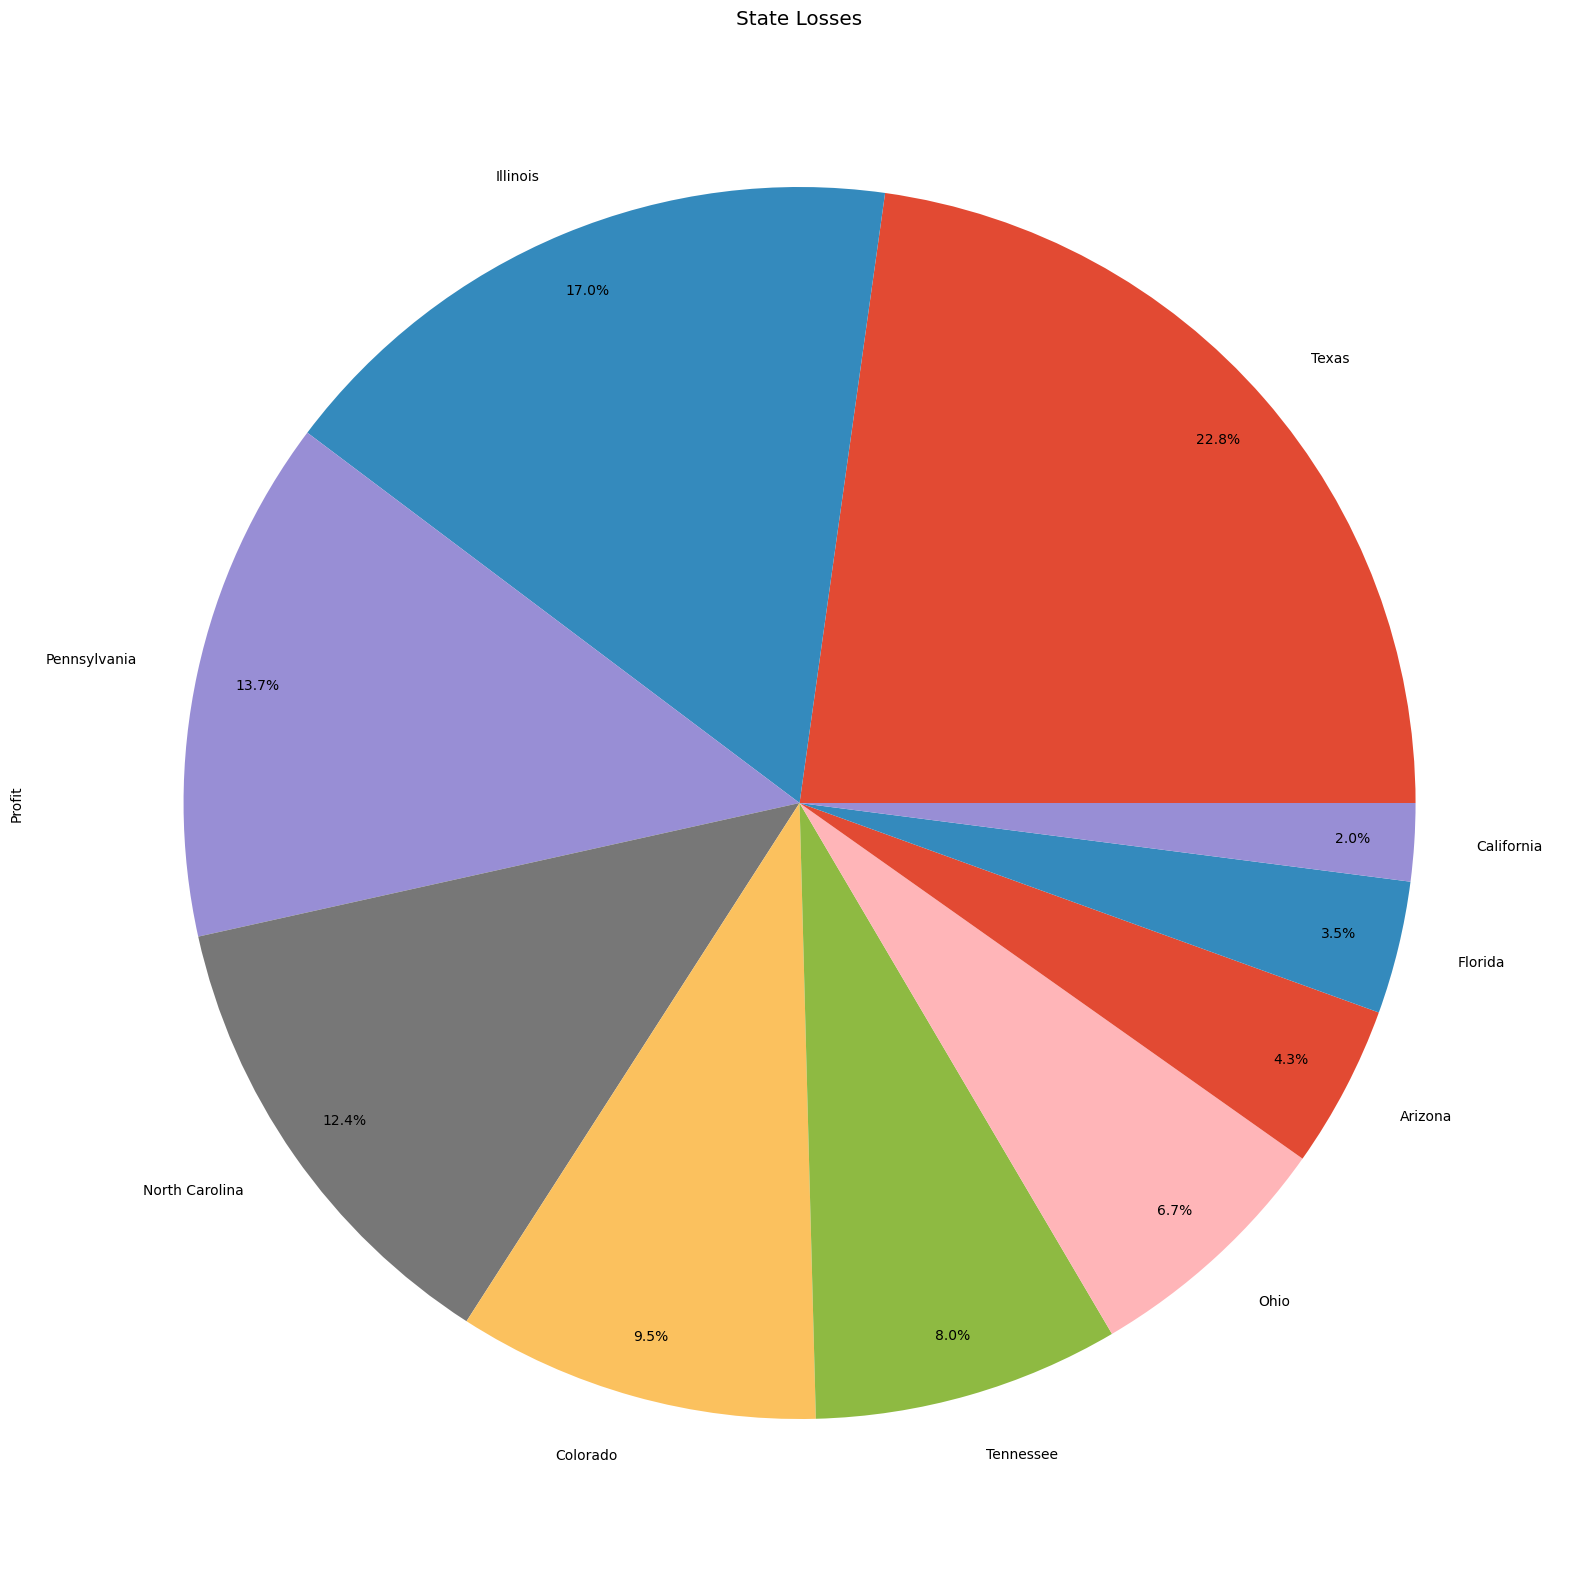

In [15]:
#identifying the states losses 
plt.figure(figsize=(30,20))
labels = state_losses['State']
plt.style.use('ggplot')
plt.title('State Losses')
state_losses['Profit'].plot.pie(autopct="%.1f%%",pctdistance=0.9,labels=labels);

In [115]:
region_losses = losses.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).round()
region_losses

,Region,Profit
0,Central,20509.0
2,South,12365.0
1,East,11897.0
3,West,9066.0


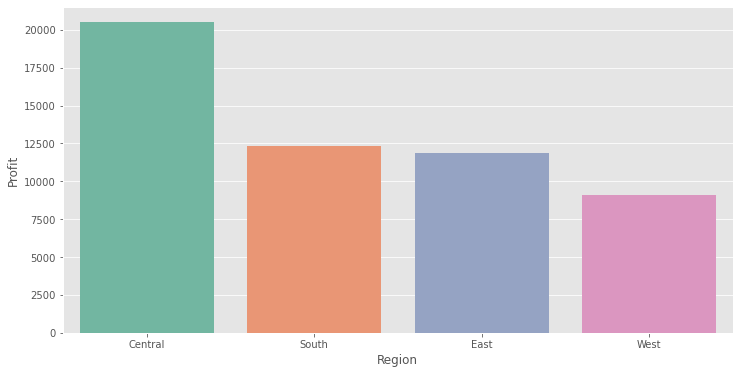

In [116]:
#unsurprisingly "Central" is leading the way in losses,we clearified that it has the most discounts
plt.figure(figsize = (12,6))
sns.barplot(x=region_losses['Region'],y=region_losses['Profit'],palette='Set2');

# Observation 

# unsurprisingly "Central" region is leading the way in losses,we clearified that it has the most discounts

In [121]:
#identifying which category is leading in losses
category_losses = losses.groupby('Category')['Profit'].sum().round()
category_losses

Category
Furniture          19292.0
Office Supplies    21743.0
Technology         12802.0
Name: Profit, dtype: float64

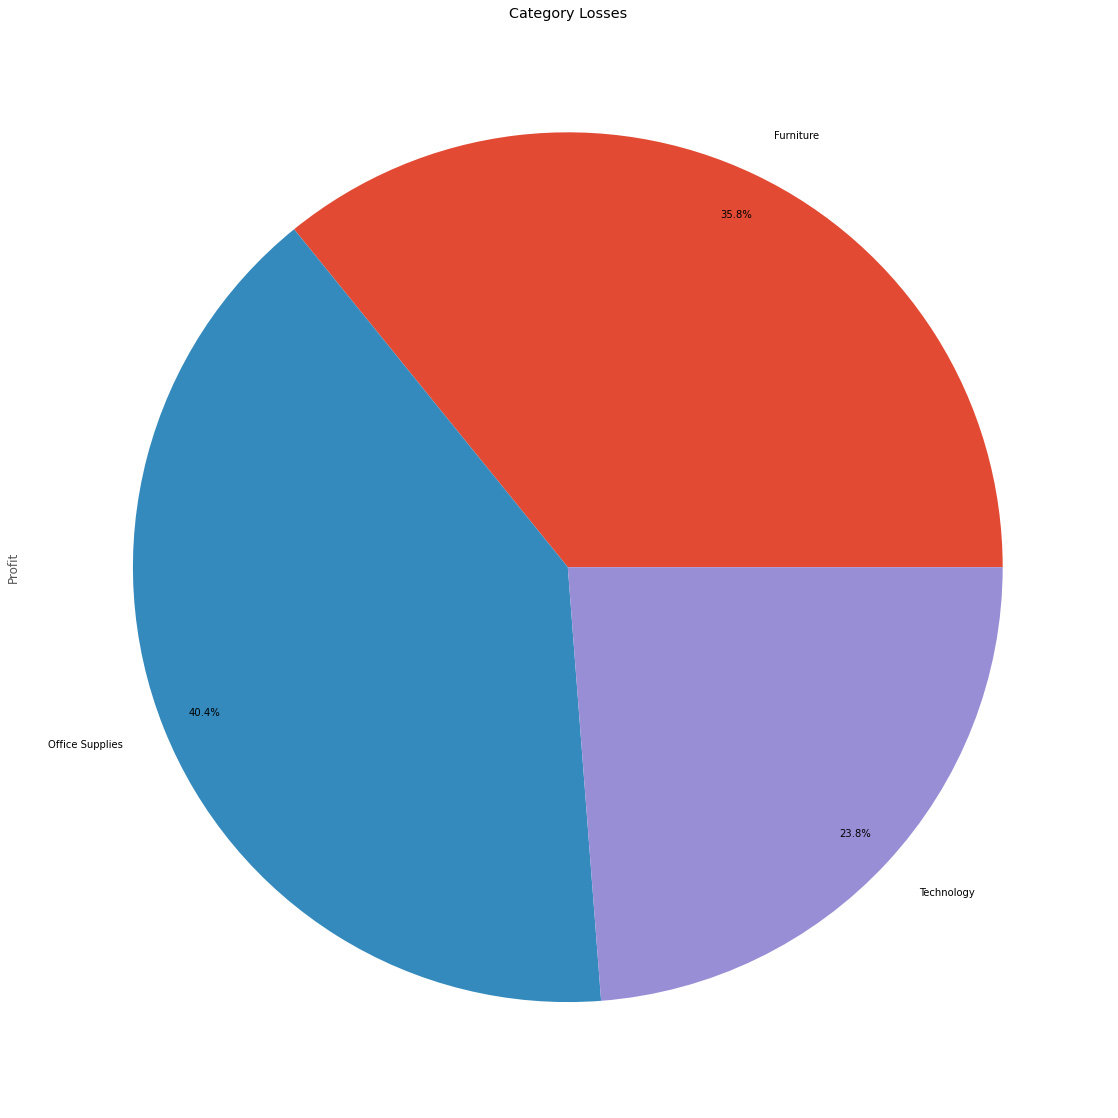

In [122]:
# office supplies as a category is leading in losses
plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.title('Category Losses')
category_losses.plot.pie(autopct="%.1f%%",pctdistance=0.9);

# Observation 

# office supplies as a category is leading in losses 


In [123]:
#identifying which sub-category is leading in losses
sub_category_losses = losses.groupby('Sub-Category')['Profit'].sum().round()
sub_category_losses

Sub-Category
Accessories      268.0
Appliances      2637.0
Binders        15801.0
Bookcases       2989.0
Chairs          3316.0
Fasteners          3.0
Furnishings     2023.0
Machines        9478.0
Phones          3055.0
Storage         1823.0
Supplies        1479.0
Tables         10964.0
Name: Profit, dtype: float64

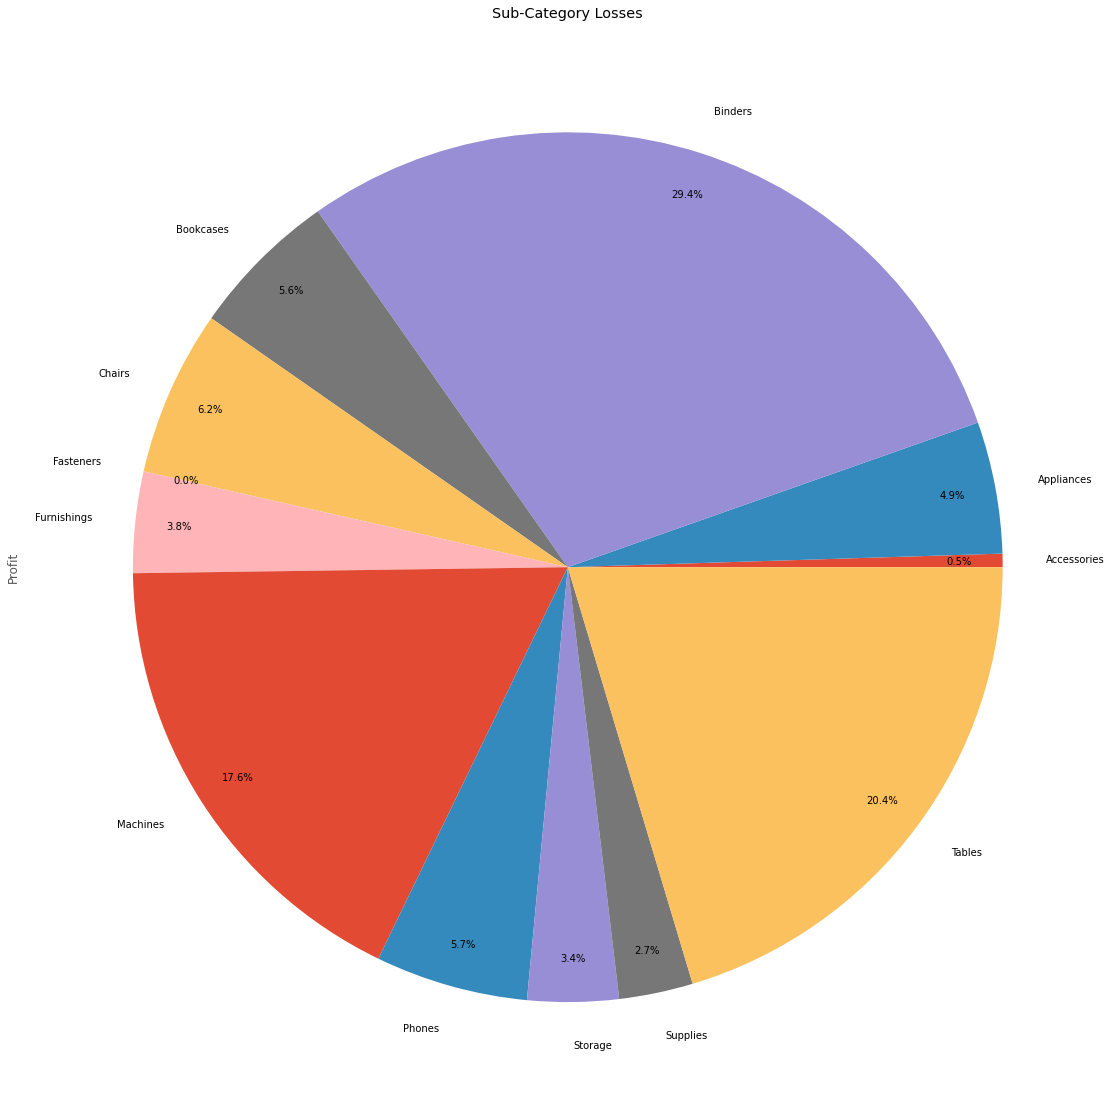

In [125]:
# Binders as a sub-category is leading in losses
plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.title('Sub-Category Losses')
sub_category_losses.plot.pie(autopct="%.1f%%",pctdistance=0.9);

# Observation

#  Binders as a sub-category is leading in losses


In [133]:
#identifying which Segment is leading in losses
segment_losses = losses.groupby('Segment')['Profit'].sum().round().reset_index().sort_values(by='Profit',ascending=False)
segment_losses

,Segment,Profit
0,Consumer,22138.0
1,Corporate,19068.0
2,Home Office,12631.0


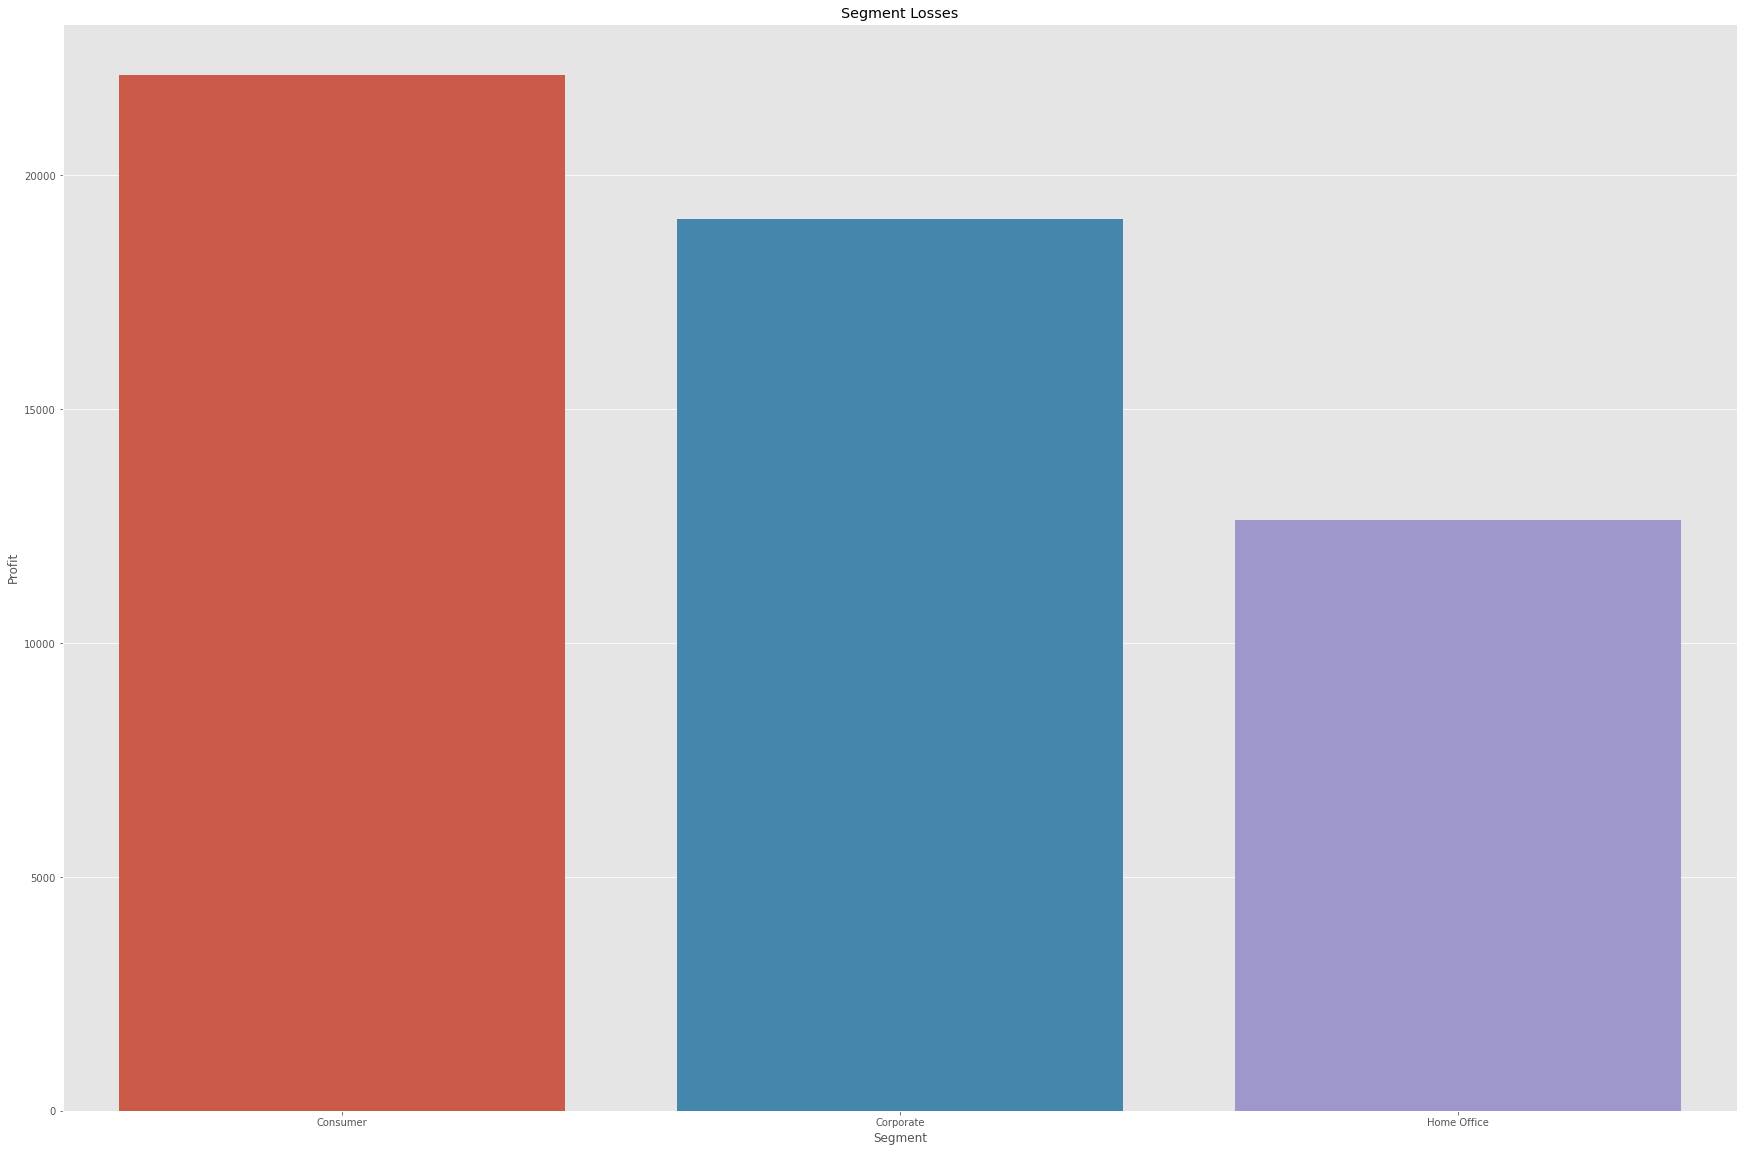

In [136]:
# consumer as a segment is leading in losses
plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.title('Segment Losses')
sns.barplot(x=segment_losses['Segment'],y=segment_losses['Profit']);

# Observation

# consumer as a segment is leading in losses


In [59]:
losses.groupby('Sub-Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)

,Sub-Category,Discount
2,Binders,151.50
6,Furnishings,25.00
11,Tables,24.80
1,Appliances,21.60
4,Chairs,20.90
8,Phones,16.80
3,Bookcases,13.27
9,Storage,10.60
7,Machines,6.60
0,Accessories,5.60


In [7]:
losses_Category_discount = losses.groupby('Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)
losses_Category_discount

,Category,Discount
1,Office Supplies,185.90
0,Furniture,85.97
2,Technology,29.00


In [9]:
losses_Segment_discount =losses.groupby('Segment')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)
losses_Segment_discount

,Segment,Discount
0,Consumer,153.07
1,Corporate,88.33
2,Home Office,59.47


# General Conclusion 

# discount plan of the company wasn't a success , discount offers have to be only for loyal customers who will benefit the company not just with the products with discount also you've worked so hard for your brand so don't give customers a reason to question if your price is fair, the sales team may have to go with another plan like increasing the value of products, renegotiating cost with vendors or suppliers and showing your value by educating your consumer and bringing them into your process and explaining the value of your products to them.